In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car_data=pd.read_csv("Cars data.csv")
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
for i in car_data.columns:
    print(car_data[i].unique(),"\t",car_data[i].nunique())

['vhigh' 'high' 'med' 'low'] 	 4
['vhigh' 'high' 'med' 'low'] 	 4
['2' '3' '4' '5more'] 	 4
['2' '4' 'more'] 	 3
['small' 'med' 'big'] 	 3
['low' 'med' 'high'] 	 3
['unacc' 'acc' 'vgood' 'good'] 	 4


In [5]:
for i in car_data.columns:
    print(car_data[i].value_counts())
    print()

low      432
med      432
high     432
vhigh    432
Name: buying, dtype: int64

low      432
med      432
high     432
vhigh    432
Name: maint, dtype: int64

4        432
3        432
2        432
5more    432
Name: doors, dtype: int64

4       576
more    576
2       576
Name: persons, dtype: int64

med      576
small    576
big      576
Name: lug_boot, dtype: int64

low     576
med     576
high    576
Name: safety, dtype: int64

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64



In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
for i in car_data.columns:
    car_data[i]=le.fit_transform(car_data[i])

In [9]:
car_data.sample(5)

,buying,maint,doors,persons,lug_boot,safety,class
1425,1,0,0,2,1,1,2
166,3,0,2,0,1,2,2
180,3,0,2,2,2,1,2
99,3,3,3,2,2,1,2
958,2,3,3,1,1,2,0


## Heatmap of the columns on dataset with each other. It shows Pearson's correlation coefficient of column w.r.t other columns.

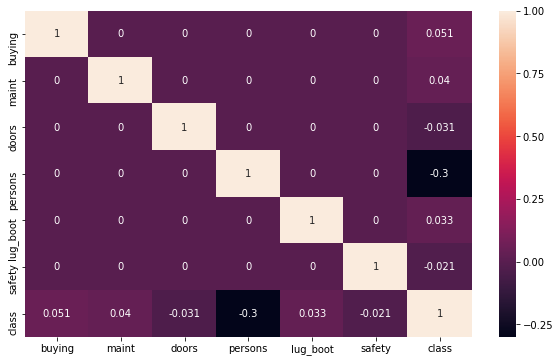

In [10]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(car_data.corr(),annot=True)

In [11]:

# Ignoring the diagonal values, it can be seen that most of the columns shows very weak correlation with 'class'. 'persons' column is showning a weak relation with 'class'. Other columns except 'class' shows no correlation with each other.
# So, plotting these columns with each other or doing any analysis on them may not give any productive output.


In [12]:
car_data.shape

(1728, 7)

In [13]:
0.2*1728

345.6

# hot encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [15]:
onehotencoder=OneHotEncoder(categorical_features=[6])

In [16]:
df=car_data

In [17]:
df=onehotencoder.fit_transform(df).toarray()

/Users/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [18]:
df=pd.DataFrame(df)

In [19]:
df.sample(5)

,0,1,2,3,4,5,6,7,8,9
355,0.0,0.0,1.0,0.0,3.0,1.0,1.0,0.0,1.0,2.0
1378,0.0,0.0,1.0,0.0,1.0,3.0,3.0,0.0,2.0,2.0
1495,1.0,0.0,0.0,0.0,1.0,0.0,3.0,1.0,2.0,2.0
622,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,2.0,2.0
601,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0


# Logistic regression

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score



In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X=car_data[car_data.columns[:-1]]
y=car_data['class']

In [23]:
X.head()

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [26]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

In [27]:
pred=logreg.predict(X_test)

In [28]:
logreg.score(X_test,y_test)

0.6647398843930635

So, basic logistic regression model is giving very less accuracy.

In [29]:
accuracy_score(y_test,pred)

0.6647398843930635

In [38]:
l_mat=confusion_matrix(y_test,pred)

In [39]:
l_mat

array([[ 21,   0,  92,   5],
       [  3,   0,  16,   0],
       [ 34,   0, 323,   1],
       [ 12,   0,  11,   1]])

# Multi-layer neural network model

In [30]:
from sklearn.neural_network import MLPClassifier

In [31]:
nn_model=MLPClassifier(hidden_layer_sizes=(100,100))

In [32]:
nn_model.fit(X_train,y_train)

/Users/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [33]:
nn_pred=nn_model.predict(X_test)

In [34]:
accuracy_score(y_test,nn_pred)

0.9845857418111753

In [35]:
print(classification_report(y_test,nn_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       118
           1       0.95      0.95      0.95        19
           2       0.99      0.99      0.99       358
           3       1.00      0.92      0.96        24

   micro avg       0.98      0.98      0.98       519
   macro avg       0.98      0.96      0.97       519
weighted avg       0.98      0.98      0.98       519



In [36]:
n_mat=confusion_matrix(y_test,nn_pred)

In [37]:
n_mat

array([[115,   1,   2,   0],
       [  1,  18,   0,   0],
       [  2,   0, 356,   0],
       [  2,   0,   0,  22]])

In [40]:
FP = l_mat.sum(axis=0) - np.diag(l_mat)  # False positive and false negative rate for logistic regression
FN = l_mat.sum(axis=1) - np.diag(l_mat)
TP = np.diag(l_mat)
TN = l_mat.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [41]:
FPR = FP/(FP+TN)

In [42]:
FNR = FN/(TP+FN)

In [43]:
FPR

array([0.12219451, 0.        , 0.73913043, 0.01212121])

In [44]:
FNR

array([0.8220339 , 1.        , 0.09776536, 0.95833333])

In [45]:
FP = n_mat.sum(axis=0) - np.diag(n_mat)  # False positive and false negative rate for neural networks
FN = n_mat.sum(axis=1) - np.diag(n_mat)
TP = np.diag(n_mat)
TN = n_mat.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

In [46]:
FPR = FP/(FP+TN)

In [47]:
FNR = FN/(TP+FN)

In [48]:
FPR

array([0.01246883, 0.002     , 0.01242236, 0.        ])

In [49]:
FNR

array([0.02542373, 0.05263158, 0.00558659, 0.08333333])